We have 5 rooms in abuilding connected by door . Rooms numbered from 0 to 4 . Outside of building is a big room 5 . 
1 and 4 lead into the building from room 5 (outside) . The goal here is to reach room 5 . The doors that lead immediately to the goal have an instant reward of 100 . Other doors which are not directly connected to the target room have zero reward . So, the rooms here  represent the state and agent's movement from one room to another represents an action 

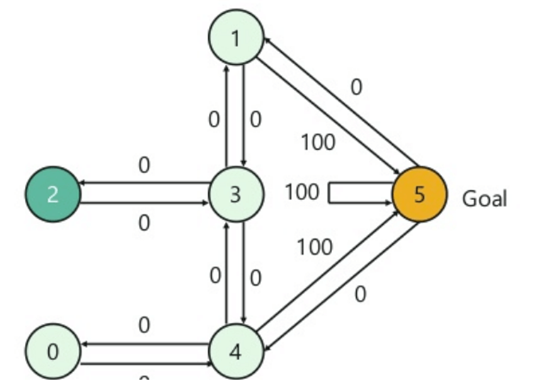


In [112]:
import numpy as np
import random
states=6
actions=6
Q=[[0 for j in range(actions)] for i in range(states)]
Reward=[[-1,-1,-1,-1,0,-1],[-1,-1,-1,0,-1,100],[-1,-1,-1,0,-1,-1],[-1,0,0,-1,0,-1],[0,-1,-1,0,-1,100],[-1,0,-1,-1,0,100]]
print(Reward)

[[-1, -1, -1, -1, 0, -1], [-1, -1, -1, 0, -1, 100], [-1, -1, -1, 0, -1, -1], [-1, 0, 0, -1, 0, -1], [0, -1, -1, 0, -1, 100], [-1, 0, -1, -1, 0, 100]]


In [124]:
l_rate=0.8 # learning rate
init_state=1 # initial state chosen as room 1

while(True):
    count=0
    max1=0
    for i in range(states):
        for j in range(actions):
            if(Reward[i][j]>=0 and Q[i][j]>0):
                count=count+1
    if(count==13):
            break        
    
    l1=[j for j in range(actions) if(Reward[init_state][j]>=0 and Q[init_state][j]==0)]
    
    while(len(l1)==0):
        init_state=random.choice([i for i in range(actions)])
        l1=[j for j in range(actions) if(Reward[init_state][j]>=0 and Q[init_state][j]==0)]
        
    #print("l1",l1)
    a=random.choice(l1)        
    #print("a's value:",a)
    l2=[(j,Q[a][j]) for j in range(actions) if(Q[a][j]>=0)]
    for i in range(len(l2)):
        if(l2[i][1]>max1):
            max1=l2[i][1]
    #print("Max1 value:",max1)
    res=Reward[init_state][a]+int(l_rate*max1)
    Q[init_state][a]=res        
    init_state=a
    #print("Init_state:",init_state)
print(Q)
    
    
    
        


[[0, 0, 0, 0, 80, 0], [0, 0, 0, 64, 0, 100], [0, 0, 0, 64, 0, 0], [0, 80, 51, 0, 80, 0], [64, 0, 0, 64, 0, 100], [0, 80, 0, 0, 80, 100]]


In [125]:
print("Optimized path:")
max1=0
init_state=2
psf=""+str(init_state)
elem=0
while(elem!=5):
    for j in range(actions):
        if(Q[init_state][j]>=0 and Q[init_state][j]>max1):
            max1=Q[init_state][j]
            elem=j
    init_state=elem
    psf=psf+"->"+str(elem)
print(psf)



        
        

Optimized path:
2->3->1->5
